<h1>Analysis Including Only Top 75% Respondents</h1>
<p>
<div class="explanation">
This analysis includes all slider and likert questions. But only
'serious' respondents are included. Seriousness was measured by
how many zeroes a respondent left. Serious respondents left at most
as many zeroes as 75% of all respondents. This procedure left 116 
respondents.
<p>
Three alternatives are presented for combining questions:
<ul>
<li>Pairwise correlations are computed from the answers to all questions.
These 6670 correlations are sorted, highest first. The resulting list can be
considered top to bottom. The lower a question pair is on the list, the
less similar the two questions are in the insights they capture.
</li>
<li>A dendrogram approach that uses the <a href="https://en.wikipedia.org/wiki/Ward%27s_method">
<i>Ward</i></a> algorithm for creating clusters
of 'related' questions, based on 'similarity' between the answers to those questions.
Similarity is measured by how similar the variances in the answers to the two questions are.</li>
<li>A dendrogram approach using the <a href="https://en.wikipedia.org/wiki/UPGMA"><i>UPGMA</i></a>
a.k.a. <i>averaging</i> algorithm.</li> Clusters are formed by minimizing the sum of 
distances between all pairs in one cluster and all pairs in neighboring clusters.
</ul>
The first method is the most direct and understandable.
</div>

In [1]:
     from IPython.core.display import HTML, display
     HTML("""
         <style>
           h1        {text-align : center}
           .subtitle {text-align : center}
           .explanation {font-size : large; 
                         line-height : 125%;
                        }
           .container { width:100% !important; }
           .highlight { background-color : yellow;}
           hr         { height : 3px;
                        background: black
                      }
         </style>
         """)


In [2]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [3]:
%matplotlib inline

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from scipy import cluster
import numpy as np
import pandas as pd
import seaborn as sns
import os
from itertools import product
#import survey_utils

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

/Users/paepcke/anaconda2/envs/women_tech/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
dataPath = os.path.join(os.getenv("HOME"), 
                        #'Project/WomenIndustrySurveyHolzblatt/Data/DataForClustering/slidersLikertByItem.csv'
                        'Project/WomenIndustrySurveyHolzblatt/Data/DataForClustering/likertSlidersByRespondentUnfolded.csv'
                       )

data = pd.read_csv(dataPath, sep=',')
# Make the question column the index, so that
# all operations on the dataframe only address
# the numeric scores:
data = data.set_index('question')
# Replace 0s with their column's median.
#data = utils.replaceZerosDataFrame(data, direction='row')


In [44]:
#data[data[data.columns] == 0]
#data['s0'].value_counts().sort_values()
# Number of zeroes in a column:
#type(data[data.columns[0]]) #--> series
#data['s0'].value_counts()[0]
#data[data.columns].values.transpose()
#data[data.columns].value_counts()[0]
participants_as_rows = data[data.columns].transpose()
#participants_as_rows.describe()
#participants_as_rows.loc[participants_as_rows == 0]
#participants_as_rows.head(3)
participants_as_rows[participants_as_rows == np.nan]
data[data == np.nan]

s0  s1  s2  s3  s4  s5  \
question                                                                     
PersonalExperience|ILackConfidence                 NaN NaN NaN NaN NaN NaN   
WorkLife|ReceivedBadReview                         NaN NaN NaN NaN NaN NaN   
Experience|Bored                                   NaN NaN NaN NaN NaN NaN   
Feel|ValuedByManager                               NaN NaN NaN NaN NaN NaN   
Power|HaveSelfConfidence                           NaN NaN NaN NaN NaN NaN   
Team|GetsInWay                                     NaN NaN NaN NaN NaN NaN   
Team|HoHum                                         NaN NaN NaN NaN NaN NaN   
Power|MenGetGoodReactions                          NaN NaN NaN NaN NaN NaN   
Promoted|DontWantClimb                             NaN NaN NaN NaN NaN NaN   
Team|PowerStruggles                                NaN NaN NaN NaN NaN NaN   
Balance|OkToGoHome                                 NaN NaN NaN NaN NaN NaN   
Men|TalkSex                                        NaN NaN NaN NaN NaN NaN   
Manager|HesitateNewChallenges                      NaN NaN NaN NaN NaN NaN   
With|ManagerImportant                              NaN NaN NaN NaN NaN NaN   
Feel|ConfidentToDeliver                            NaN NaN NaN NaN NaN NaN   
PersonalExperience|EvaledNegativelyForShortcomings NaN NaN NaN NaN NaN NaN   
Models|DontNeedOne                                 NaN NaN NaN NaN NaN NaN   
Manager|NoGrowthAssignments                        NaN NaN NaN NaN NaN NaN   
Team|NobodyToTalkTo                                NaN NaN NaN NaN NaN NaN   
Manager|AmOnMyOwn                                  NaN NaN NaN NaN NaN NaN   
Balance|CultureSupportive                          NaN NaN NaN NaN NaN NaN   
Power|LearningTechniques                           NaN NaN NaN NaN NaN NaN   
Promoted|MetCriteria                               NaN NaN NaN NaN NaN NaN   
Power|WorryAboutOpinions                           NaN NaN NaN NaN NaN NaN   
Promoted|UnsureWhatToDo                            NaN NaN NaN NaN NaN NaN   
Mentor|NotEnoughPeople                             NaN NaN NaN NaN NaN NaN   
Models|HaveNone                                    NaN NaN NaN NaN NaN NaN   
GenderBalance|TreatedDifferently                   NaN NaN NaN NaN NaN NaN   
Models|ICouldBeOne                                 NaN NaN NaN NaN NaN NaN   
PersonalExperience|TeamNotValuesMyWork             NaN NaN NaN NaN NaN NaN   
...                                                 ..  ..  ..  ..  ..  ..   
WorkLife|HateProduct/project                       NaN NaN NaN NaN NaN NaN   
Balance|TeamShiftsWork                             NaN NaN NaN NaN NaN NaN   
Power|SeekingFeedback                              NaN NaN NaN NaN NaN NaN   
WorkLife|HateTeam                                  NaN NaN NaN NaN NaN NaN   
Models|WantModelsLife                              NaN NaN NaN NaN NaN NaN   
Power|OthersAreBetter                              NaN NaN NaN NaN NaN NaN   
Power|FeelValued                                   NaN NaN NaN NaN NaN NaN   
With|NewJobAnyCase                                 NaN NaN NaN NaN NaN NaN   
Mentor|HaveNobody                                  NaN NaN NaN NaN NaN NaN   
Experience|ExpectToAdjust                          NaN NaN NaN NaN NaN NaN   
Models|ColleaguesSucceeding                        NaN NaN NaN NaN NaN NaN   
Men|Interrupt                                      NaN NaN NaN NaN NaN NaN   
Mentor|AssignedDidNotClick                         NaN NaN NaN NaN NaN NaN   
Mentor|WantMoreWomen                               NaN NaN NaN NaN NaN NaN   
Team|MustProveMySelf                               NaN NaN NaN NaN NaN NaN   
Men|CultureMoreThanGender                          NaN NaN NaN NaN NaN NaN   
Balance|OkToTalk                                   NaN NaN NaN NaN NaN NaN   
Balance|CompanyFlexible                            NaN NaN NaN NaN NaN NaN   
Men|MustWorkLonger                                 NaN NaN NaN NaN NaN NaN

In [6]:
# Remove the spurious: Men|NoFormerCollab12, Men|NoFormerCollab37, Men|NoFormerCollab62
try:
    data.drop(['Men|NoFormerCollab12', 'Men|NoFormerCollab37', 'Men|NoFormerCollab62', 'Men|NoFormerCollab87'], inplace=True)
except ValueError:
    # Already ran this cell, so the entries are gone:
    pass


<div class="explanation">Find respondents who answered 'most' questions. Method:
Count the number of zeroes of every respondent. Sort
those numbers in increasing order. Accept the first
75% of the respondents.
</div>

In [7]:
num_zeroes = participants_as_rows.apply(pd.Series.value_counts, axis=1)[0]
num_zeroes_sorted = num_zeroes.sort_values()
num_records = len(num_zeroes_sorted)
seventy_five_perc_cutoff = np.round(np.round(75*num_records/100)) # 163


In [8]:
#print('Median number of zeroes: %s' % num_zeroes.median())
#print('Mean number of zeroes: %s' % num_zeroes.mean())
#print('75th percentile zeroes: %s' % num_zeroes.quantile(0.75))


In [9]:

#num_zeroes_sorted.iloc[seventy_five_perc_cutoff] # 102
#num_zeroes_sorted.iloc[99:104]
#"num_zeroes_sorted

In [10]:
# Get list of ids for participants who were 
# with 75th percentile of non-zero entries.
# I.e. drop participants with the top 25% number
# of zero answers:
serious_respondent_ids = num_zeroes_sorted.iloc[0:seventy_five_perc_cutoff].index
serious_respondents = data[serious_respondent_ids]
# Now have:
#      s1,s2,s3,...
#   q1  1, 2, 3,...
#   q2  4, 5, 6,...

# Drop questions (i.e. rows) that nobody answered (i.e. are all zeroes):
serious_respondents = serious_respondents.loc[~(serious_respondents==0).all(axis=1)]

len(serious_respondents) # 116 questions
len(serious_respondents.columns) # 163 respondents
#serious_respondents.head(4)


163

In [11]:
html_str = '<span class="highlight">Number of serious questions: %s<br>' %  len(serious_respondents) +\
'Number of questions: %s' % len(serious_respondents.columns)
HTML(html_str)

<h2>Correlation Matrix Method for Finding Similar Questions</h2>

In [12]:
# Still have:
#      s1,s2,s3,...
#   q1  1, 2, 3,...
#   q2  4, 5, 6,...
#
# Transpose to get observations as rows, and columns as features:
#      q1,q2,q3,...
#   s1  1, 2, 3,...
#   s2  4, 5, 6,...

corr_matrix = serious_respondents.transpose().corr()
#corr_matrix.head(3)


In [13]:
# Get rid of the lower-left triangle of the correlation matrix:

#array([[ True, False, False],
#       [ True,  True, False],
#       [ True,  True,  True]], dtype=bool)

corr_matrix_tri_lower_mask = np.tril(np.ones(corr_matrix.shape).astype(np.bool))
#corr_matrix_tri_lower

# This mask to turn upper triangle into NaNs:
corr_matrix_tri_lower = corr_matrix.where(corr_matrix_tri_lower_mask)


<h3>Flatten matrix into a one-column DataFrame, then sort by decreasing correlation:</h3>

In [14]:
row_name_series = pd.Series(corr_matrix_tri_lower.index.values)
col_name_series = pd.Series(corr_matrix_tri_lower.columns.values)
# Get: Series([(SurveyItem1, SurveyItem1),
#              (SurveyItem1, SurveyItem2),
#              (SurveyItem1, SurveyItem3),
#              (SurveyItem2, SurveyItem1),
#              (SurveyItem2, SurveyItem2),
#              (SurveyItem2, SurveyItem3),
#                     ...
#            ])
all_cell_names  = pd.Series(list(product(row_name_series, col_name_series)))
#all_cell_names

# Flatten the correlation matrix into a 1-column DF:
named_correlations = pd.DataFrame(corr_matrix_tri_lower.values.flatten(), index=all_cell_names, columns=['Correlations'])

# Remove the diagonal 1s entries: 

# Currently the question-pairs are the index. Turn them into a 
# second column named 'Questions':
#                   	Questions                       	Correlations
#    0 	(PersonalExperience|ILackConfidence, PersonalE... 	1.000000
#    1 	(PersonalExperience|ILackConfidence, WorkLife|... 	0.620947

named_correlations = named_correlations.reset_index().rename(columns={'index' : 'Questions'})
named_correlations = named_correlations.where(named_correlations.Questions.apply(lambda x: x[0] != x[1])).dropna()
#named_correlations

# Sort by descending correlation:
# 	Questions 	Correlations
#9404 	(Team|NotPartOfGrp, Manager|HesitateToTakeChal... 	1.000000
#9755 	(Manager|HesitateToTakeChallenges, Team|NotPar... 	1.000000
#     ...
#2840 	(Promoted|UnsureWhatToDo, Promoted|DontWantClimb) 	0.995508
#968 	(Promoted|DontWantClimb, Promoted|UnsureWhatToDo) 	0.995508
#5330 	(Balance|ManagerSendsHome, Balance|CultureSupp... 	0.994896
#2405 	(Balance|CultureSupportive, Balance|ManagerSen... 	0.994896
#     ...
         
named_correlations.sort_values(by='Correlations', ascending=False, inplace=True)
#named_correlations
#len(named_correlations)

In [15]:
html_str = '<span class="highlight">Number of pairwise correlations: %s</span>' % len(named_correlations)
HTML(html_str)

<div class="explanation">List of pairwise correlations in descending order:</div>

In [16]:
# Print list of sorted correlations:
cm = sns.light_palette("green", as_cmap=True)

styled_named_correlations = named_correlations.style.background_gradient(cmap=cm)
styled_named_correlations

<hr>

<h2>Dendrogram Method Using Ward for Clustering</h2>
<div class="explanation">This method finds cluster members by grouping those questions that had very similar variances.
</div>

(Note: more readable question layout further down)


In [17]:
# Find the best algorithm for dendrogram clustering. Supposedly
# the algorithm with the largest Cophenet correlation coefficient
# tends to be best:

# Cophenet correlation coefficient measures 
# how faithfully a dendrogram preserves pairwise
# distance between the original data points, use
# the algo that yields the highest coefficient:

max_c = 0
max_algo = ''
max_cluster_info = None
algo_results = {}
for algo in ['ward', 'centroid', 'weighted', 'average', 'complete', 'single']:
    cluster_info = linkage(serious_respondents, algo)
    (c, coph_dists) = cophenet(cluster_info, pdist(serious_respondents))
    if c > max_c:
        max_c = c
        max_algo = algo
        max_cluster_info = cluster_info
    algo_results[algo] = {'cophenet_coeff' : c,
                          'cluster_info' : cluster_info
                          }
print("Winning Cocophenet correlation coefficient is the '%s' algorithm: %s" % (max_algo, max_c))
# cluster_info = max_cluster_info
# algo = max_algo
print("... but using Ward (c= %s)" % algo_results['ward']['cophenet_coeff'])

algo = 'ward'
cluster_info = algo_results[algo]['cluster_info']


Winning Cocophenet correlation coefficient is the 'average' algorithm: 0.866899197557
... but using Ward (c= 0.730963190973)


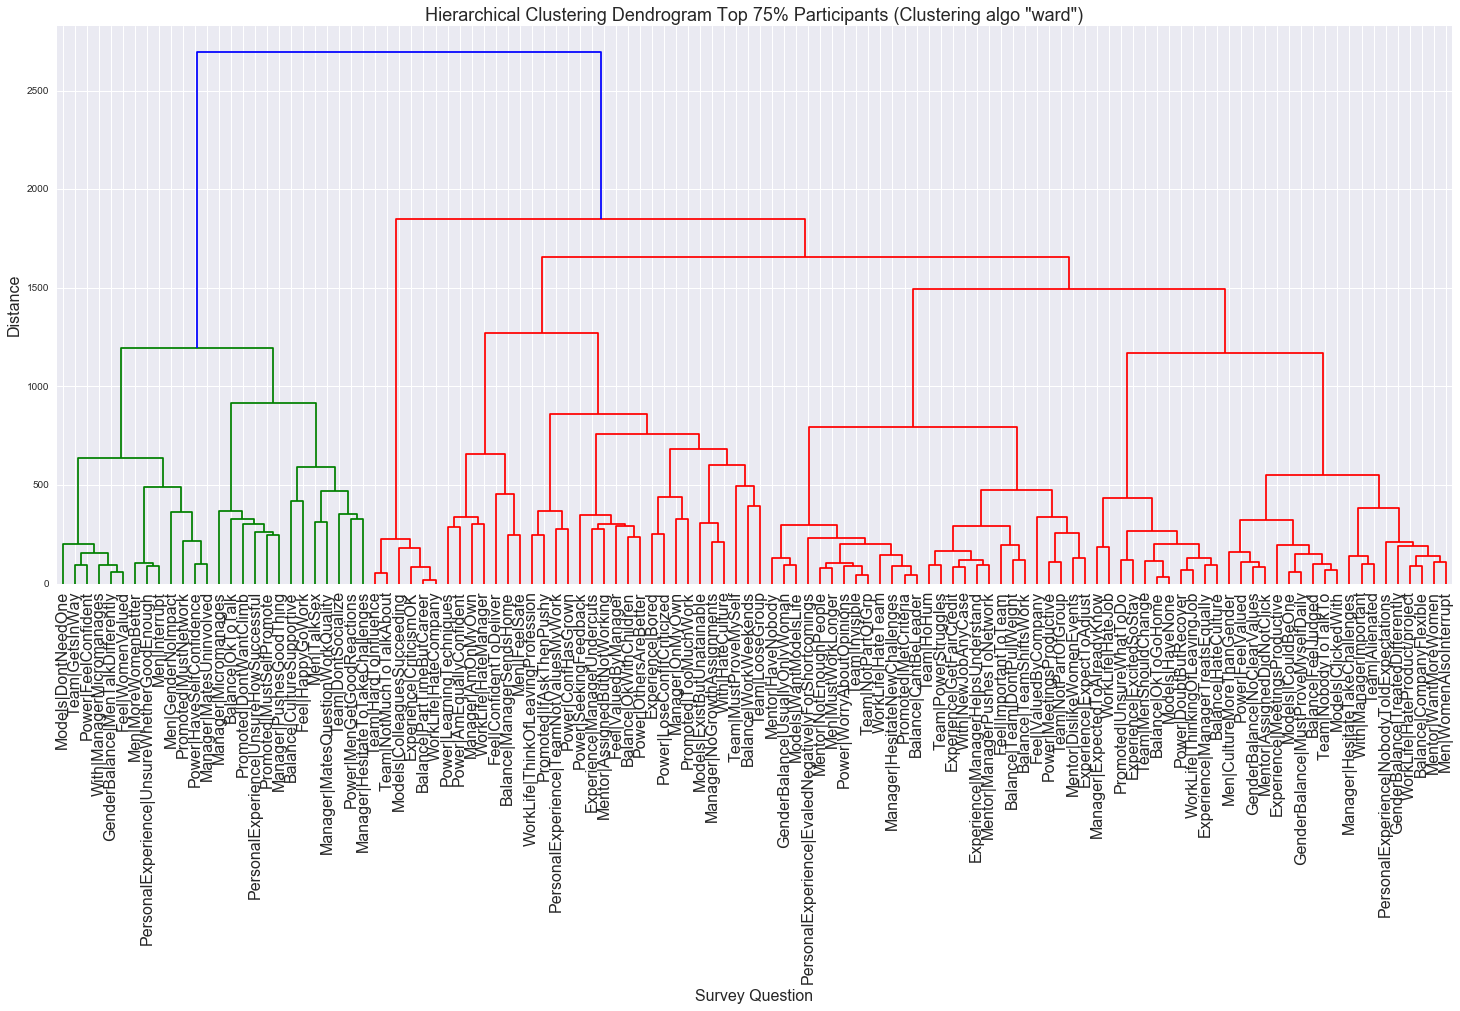

In [18]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
title = 'Hierarchical Clustering Dendrogram Top 75%% Participants (Clustering algo "%s")' % algo
plt.title(title, fontsize=18)
plt.xlabel('Survey Question', fontsize=16)
plt.ylabel('Distance', fontsize=16)
dendrogram_data = dendrogram(
        algo_results[algo]['cluster_info'],
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=16.,  # font size for the x axis labels
        labels=data.index,  # question names
)
plt.show()



<div class="explanation">Make groups more readable:</div>

In [24]:
# Build a DataFrame that combines question, distance, and color.
# Then change the names of the one-letter colors to more readable
# expanded form:
clusters = zip(dendrogram_data['ivl'], dendrogram_data['leaves'], dendrogram_data['color_list'])
clusters = pd.DataFrame(clusters, columns=['Question', 'Distance', 'Color'])
clusters['Color'].replace(['g','r','b','c','m','y','k'], 
                          ['green','red','blue','cyan','magenta','yellow','black'],
                          inplace=True
                          )

# Save the Ward-based clusters for later:
ward_clusters = clusters.copy()
def cluster_table_styler(val):
    if val == 'green':
        return("background-color : green")
    elif val == 'red':
        return("background-color : red")
    elif val == 'blue':
        return("background-color : blue")
    elif val == 'cyan':
        return("background-color : cyan")
    elif val == 'magenta':
        return("background-color : magenta")
    elif val == 'yellow':
        return("background-color : yellow")
    elif val == 'black':
        return("background-color : black")
    else:
        return ''
    
clusters.style.applymap(cluster_table_styler)



<hr>

<h2>Alternative Dendrogram: using highest-cophenet-coefficient algorithm ('average'):</h2>
<div class="explanation">
The <i>average</i> clustering method minimizes the average distance between any two elements of neighboring clusters.
The method is also known as UPGMA <b>U</b>nweighted <b>P</b>air <b>G</b>roup <b>M</b>ethod with <b>A</b>rithmetic <b>M</b>ean.
</div>

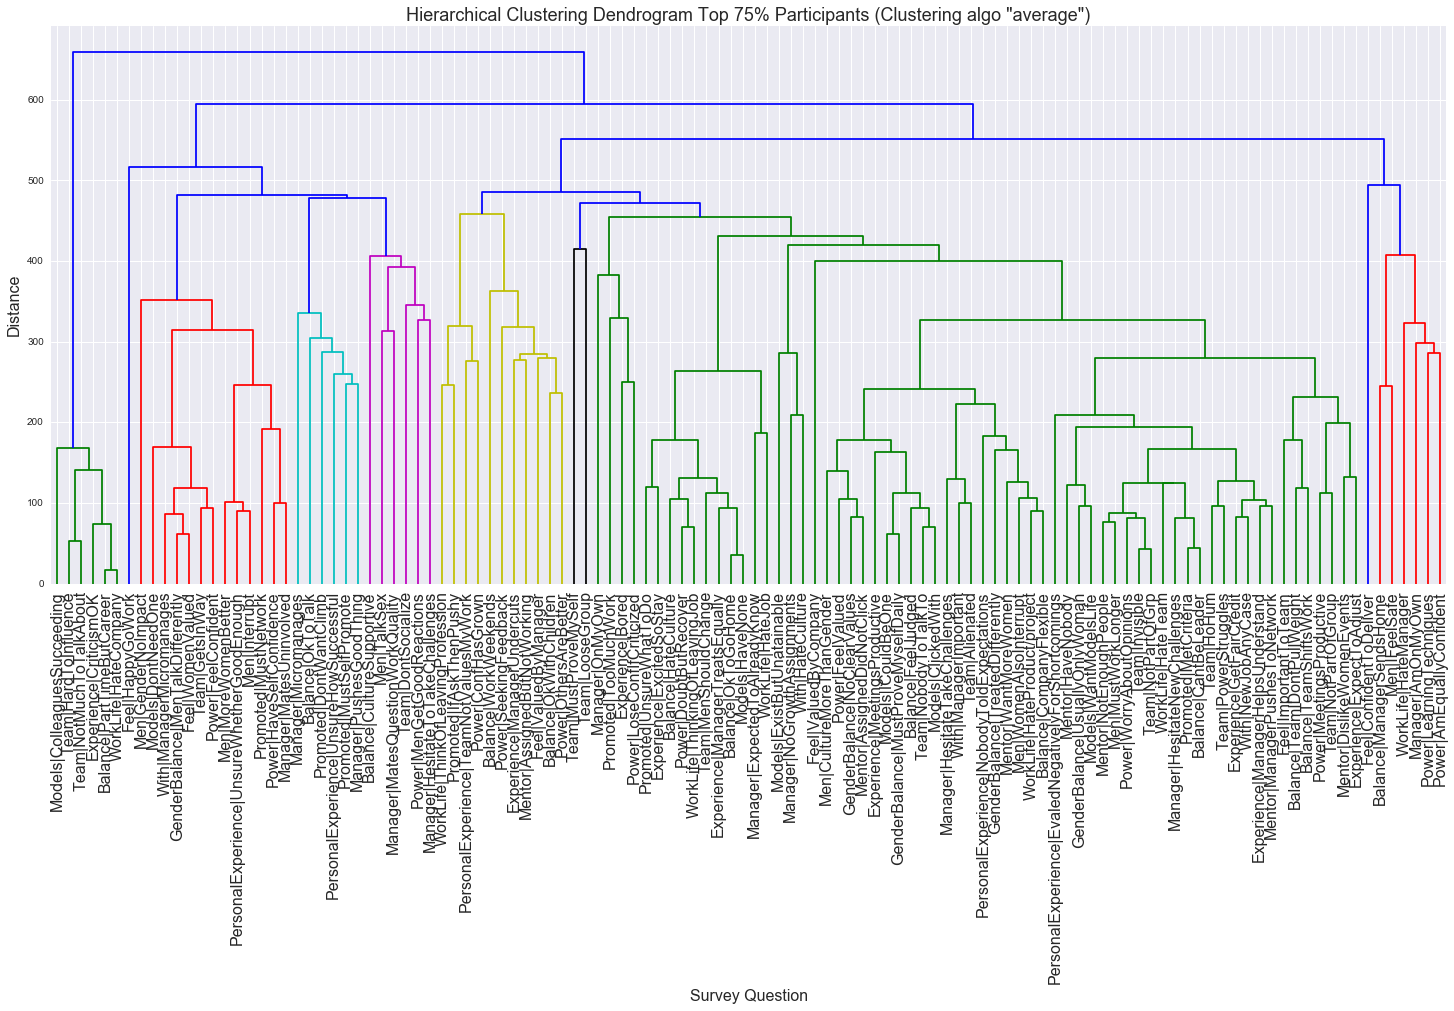

In [20]:
algo = max_algo

# calculate full dendrogram
plt.figure(figsize=(25, 10))
title = 'Hierarchical Clustering Dendrogram Top 75%% Participants (Clustering algo "%s")' % algo
plt.title(title, fontsize=18)
plt.xlabel('Survey Question', fontsize=16)
plt.ylabel('Distance', fontsize=16)
dendrogram_data = dendrogram(
        algo_results[algo]['cluster_info'],
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=16.,  # font size for the x axis labels
        labels=data.index,  # question names
)
plt.show()



<div class="explanation">
Make groups easier to read:
</div>

In [25]:
# Build a DataFrame that combines question, distance, and color.
# Then change the names of the one-letter colors to more readable
# expanded form:
clusters = zip(dendrogram_data['ivl'], dendrogram_data['leaves'], dendrogram_data['color_list'])
clusters = pd.DataFrame(clusters, columns=['Question', 'Distance', 'Color'])
clusters['Color'].replace(['g','r','b','c','m','y','k'], 
                          ['green','red','blue','cyan','magenta','yellow','black'],
                          inplace=True
                          )

def cluster_table_styler(val):
    if val == 'green':
        return("background-color : green")
    elif val == 'red':
        return("background-color : red")
    elif val == 'blue':
        return("background-color : blue")
    elif val == 'cyan':
        return("background-color : cyan")
    elif val == 'magenta':
        return("background-color : magenta")
    elif val == 'yellow':
        return("background-color : yellow")
    elif val == 'black':
        return("background-color : black")
    else:
        return ''

# Save 'average'-generated clusters for later:
average_clusters = clusters.copy()
    
clusters.style.applymap(cluster_table_styler)

<hr>

<h2>Cluster using K-Means, and plot some questions from the above groupings.</h2>

In [32]:
# Reshape <i>serious_respondents</i> to have rows be 'observations' (i.e. all answers by one respondent).
# Have the columns be the question answers: the 'features' to get:
#     q1, q2, q2,...
# s1  1   2   3,...
# s2  4   5   6,...

# Make a copy of serious_respondents to work with.
# Use the questions in ward_clusters:
ward_questions = ward_clusters['Question']
#*****some_respondents = serious_respondents.copy().ix[ward_questions].reset_index().rename(columns={'index' : 'Question'})
some_respondents = serious_respondents.copy()
#some_respondents.reset_index().rename(columns={'index' : 'Question'})

#*****some_respondents = some_respondents.set_index('question').transpose()
# For clustering, numbers must be floats:
some_respondents = some_respondents.astype(np.float)
#some_respondents[some_respondents == np.nan] # lots

#some_respondents.head(3)


s100   s98   s97   s79   s48   s85   s57  \
question                                                                       
PersonalExperience|ILackConfidence  35.0  59.0  82.0  88.0  53.0  41.0  59.0   
WorkLife|ReceivedBadReview          94.0  94.0  94.0  29.0  76.0  94.0  65.0   
Experience|Bored                    62.0  37.0  37.0  37.0  37.0  37.0  37.0   

                                     s58   s60   s63  ...   s166  s165  s164  \
question                                              ...                      
PersonalExperience|ILackConfidence  24.0   6.0  65.0  ...    0.0   0.0   0.0   
WorkLife|ReceivedBadReview          59.0  82.0  53.0  ...    0.0   0.0   0.0   
Experience|Bored                    37.0  37.0  37.0  ...    0.0   0.0   0.0   

                                    s162  s159  s163  s157  s156  s155  s158  
question                                                                      
PersonalExperience|ILackConfidence   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
WorkLife|ReceivedBadReview           0.0   0.0   0.0   0.0   0.0   0.0   0.0  
Experience|Bored                     0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[3 rows x 163 columns]

Compute clusters for k=1 to k=10. Plot the resulting 
overall distortion for each k. Then pick a k where
the curve has an 'elbow'. Our case, 4 clusters is an option:

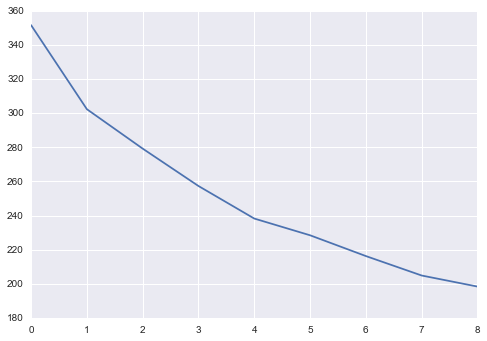

In [33]:
# Get clustering for k=1 to k=10 to see where distortion levels out:
initial = [cluster.vq.kmeans(some_respondents, k) for k in range(1,10)]
#initial
plt.plot([distortion for (centroids, distortion) in initial])

In [41]:
#some_respondents.head(3)
some_respondents.head(4)
foo = some_respondents.transpose()
#some_respondents[some_respondents == np.nan]
foo[foo == np.nan]

s100  s98  s97  s79  s48  \
question                                                                       
PersonalExperience|ILackConfidence                   NaN  NaN  NaN  NaN  NaN   
WorkLife|ReceivedBadReview                           NaN  NaN  NaN  NaN  NaN   
Experience|Bored                                     NaN  NaN  NaN  NaN  NaN   
Feel|ValuedByManager                                 NaN  NaN  NaN  NaN  NaN   
Power|HaveSelfConfidence                             NaN  NaN  NaN  NaN  NaN   
Team|GetsInWay                                       NaN  NaN  NaN  NaN  NaN   
Team|HoHum                                           NaN  NaN  NaN  NaN  NaN   
Power|MenGetGoodReactions                            NaN  NaN  NaN  NaN  NaN   
Promoted|DontWantClimb                               NaN  NaN  NaN  NaN  NaN   
Team|PowerStruggles                                  NaN  NaN  NaN  NaN  NaN   
Balance|OkToGoHome                                   NaN  NaN  NaN  NaN  NaN   
Men|TalkSex                                          NaN  NaN  NaN  NaN  NaN   
Manager|HesitateNewChallenges                        NaN  NaN  NaN  NaN  NaN   
With|ManagerImportant                                NaN  NaN  NaN  NaN  NaN   
Feel|ConfidentToDeliver                              NaN  NaN  NaN  NaN  NaN   
PersonalExperience|EvaledNegativelyForShortcomings   NaN  NaN  NaN  NaN  NaN   
Models|DontNeedOne                                   NaN  NaN  NaN  NaN  NaN   
Manager|NoGrowthAssignments                          NaN  NaN  NaN  NaN  NaN   
Team|NobodyToTalkTo                                  NaN  NaN  NaN  NaN  NaN   
Manager|AmOnMyOwn                                    NaN  NaN  NaN  NaN  NaN   
Balance|CultureSupportive                            NaN  NaN  NaN  NaN  NaN   
Power|LearningTechniques                             NaN  NaN  NaN  NaN  NaN   
Promoted|MetCriteria                                 NaN  NaN  NaN  NaN  NaN   
Power|WorryAboutOpinions                             NaN  NaN  NaN  NaN  NaN   
Promoted|UnsureWhatToDo                              NaN  NaN  NaN  NaN  NaN   
Mentor|NotEnoughPeople                               NaN  NaN  NaN  NaN  NaN   
Models|HaveNone                                      NaN  NaN  NaN  NaN  NaN   
GenderBalance|TreatedDifferently                     NaN  NaN  NaN  NaN  NaN   
Models|ICouldBeOne                                   NaN  NaN  NaN  NaN  NaN   
PersonalExperience|TeamNotValuesMyWork               NaN  NaN  NaN  NaN  NaN   
...                                                  ...  ...  ...  ...  ...   
Men|MoreWomenBetter                                  NaN  NaN  NaN  NaN  NaN   
Balance|OkWithChildren                               NaN  NaN  NaN  NaN  NaN   
WorkLife|HateProduct/project                         NaN  NaN  NaN  NaN  NaN   
Balance|TeamShiftsWork                               NaN  NaN  NaN  NaN  NaN   
Power|SeekingFeedback                                NaN  NaN  NaN  NaN  NaN   
WorkLife|HateTeam                                    NaN  NaN  NaN  NaN  NaN   
Models|WantModelsLife                                NaN  NaN  NaN  NaN  NaN   
Power|OthersAreBetter                                NaN  NaN  NaN  NaN  NaN   
Power|FeelValued                                     NaN  NaN  NaN  NaN  NaN   
With|NewJobAnyCase                                   NaN  NaN  NaN  NaN  NaN   
Mentor|HaveNobody                                    NaN  NaN  NaN  NaN  NaN   
Experience|ExpectToAdjust                            NaN  NaN  NaN  NaN  NaN   
Models|ColleaguesSucceeding                          NaN  NaN  NaN  NaN  NaN   
Men|Interrupt                                        NaN  NaN  NaN  NaN  NaN   
Mentor|AssignedDidNotClick                           NaN  NaN  NaN  NaN  NaN   
Mentor|WantMoreWomen                                 NaN  NaN  NaN  NaN  NaN   
Team|MustProveMySelf                                 NaN  NaN  NaN  NaN  NaN   
Men|CultureMoreThanGender                           

In [38]:
# some_respondents currently in this form:
#     s1, s2, s2,...
# q1  1   2   3,...
# q2  4   5   6,...

# Get it back to rows are observations:
#     q1, q2, q2,...
# s1  1   2   3,...
# s2  4   5   6,...	

some_respondents = some_respondents.transpose()


# Pick four clusters:
(centroids, distortion) = initial[3]

# Assign each observation to one cluster:
(centroid_assignments, distortions) = cluster.vq.vq(some_respondents, centroids)

green_ward_questions = ward_clusters[ward_clusters.Color == 'green']
red_ward_questions = ward_clusters[ward_clusters.Color == 'red']
cyan_ward_questions = ward_clusters[ward_clusters.Color == 'cyan']
blue_ward_questions = ward_clusters[ward_clusters.Color == 'blue']

#green_questions.sample().Question
#print(some_respondents[green_questions.sample().Question])
#green_questions

for i in range(4):
    green_question = green_ward_questions.sample().Question
    red_question   = red_ward_questions.sample().Question
    
    green_responses = some_respondents[green_question]
    # Remove respondents who didn't answer this particular question:
    green_responses = green_responses[green_responses > 0]

    red_responses = some_respondents[red_question]
    # Remove respondents who didn't answer this particular question:
    red_responses = red_responses[red_responses > 0]

    plt.scatter(green_responses, red_responses,
            c=centroid_assignments,
            s=60)
    plt.show()


ValueError: obs and code should have same number of features (columns)

<hr>

In [ ]:
ward_clusters.head(3)
ward_clusters[ward_clusters.Color == 'green']
green_questions = ward_clusters[ward_clusters.Color == 'green']
red_questions = ward_clusters[ward_clusters.Color == 'red']
cyan_questions = ward_clusters[ward_clusters.Color == 'cyan']
blue_questions = ward_clusters[ward_clusters.Color == 'blue']

In [ ]:
ward_questions = ward_clusters['Question'].iloc[:31]
len(ward_questions)
#plt.plot(data[ward_questions])
some_respondents = serious_respondents.copy().ix[ward_questions].reset_index().rename(columns={'index' : 'Question'})
some_respondents = some_respondents.rename(columns={'question' : 'Question'})
thin_ward_clusters = ward_clusters[['Question', 'Color']].set_index('Question')
thin_some_respondents = some_respondents.set_index('Question')
thin_some_respondents = thin_some_respondents.join(thin_ward_clusters, how='inner')
#thin_some_respondents
#thin_ward_clusters


In [ ]:
import os
thin_some_respondents.reset_index().to_csv(os.path.join(os.getenv('HOME'), 'tmp/some_respondents.csv'))
thin_some_respondents
